In [1]:
import algo_func
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sg
import matplotlib
import scipy as sp
import importlib
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

import seaborn as sns

In [2]:
data = pd.read_csv('elec_data.csv',index_col = 0)
scaler = StandardScaler()
ot = np.expand_dims(data['OT'].array,axis =1)
ot_ = scaler.fit_transform(ot)

fil_order = 7
delay = 10
train_2,val_2,test_2 = ot_[0:10_000],ot_[10_000:11_000],ot_[11_000:]

ip_train_2 = train_2
op_train_2 = train_2[fil_order+10:]

ip_val_2 = val_2
op_val_2 = val_2[fil_order+10:]

ip_test_2 = test_2
op_test_2 = test_2[fil_order+10:]

In [5]:
rk_size_arr = np.concatenate((np.linspace(10,2,5),np.linspace(1,0.2,5),np.linspace(1,0.02,5)))
step_size_arr = np.concatenate((np.linspace(1,0.2,5),np.linspace(0.1,0.02,5),np.linspace(0.01,0.002,5)))

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

#klms_mse_train = np.zeros((k1,k2))
klms_mse_val = np.zeros((k1,k2))
#klms_mse_test = np.zeros((k1,k2))

fil_order = 7

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,cnt = algo_func.KLMS_mse_2(ip_train_2,op_train_2,fil_order,rk_size,step_size)
        #klms_mse_train[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,e,centers,rk_size,step_size)
        klms_mse_val[i][j] = algo_func.klms_mseror(ip_train_2,op_train_2,fil_order,e,centers,rk_size,step_size)[0]
        #klms_mse_test[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,e,centers,rk_size,step_size)

15 15


100%|███████████████████████████████████████████| 15/15 [10:43<00:00, 42.91s/it]


<Axes: >

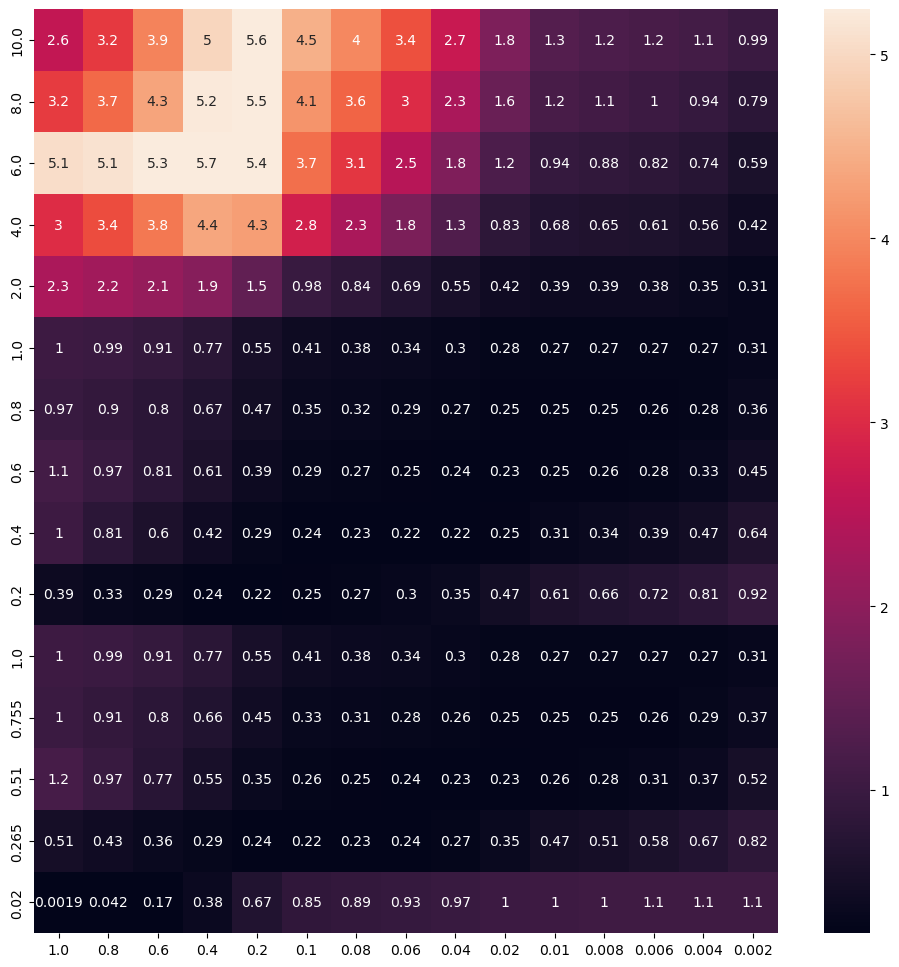

In [6]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(np.round(klms_mse_val,5),xticklabels= np.round(step_size_arr,3),yticklabels=np.round(rk_size_arr,3),robust = True,annot = True)

In [32]:
rk_size_arr = [0.6]
step_size_arr = [0.02]

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

klms_mse_train = np.zeros((k1,k2))
klms_mse_val = np.zeros((k1,k2))
klms_mse_test = np.zeros((k1,k2))

fil_order = 7

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,cnt = algo_func.KLMS_mse_2(ip_train_2,op_train_2,fil_order,rk_size,step_size)
        klms_mse_train[i][j] = algo_func.klms_mseror(ip_train_2,op_train_2,fil_order,e,centers,rk_size,step_size)[0]
        klms_mse_val[i][j] = algo_func.klms_mseror(ip_val_2,op_val_2,fil_order,e,centers,rk_size,step_size)[0]
        klms_mse_test[i][j] = algo_func.klms_mseror(ip_test_2,op_test_2,fil_order,e,centers,rk_size,step_size)[0]

1 1


100%|█████████████████████████████████████████████| 1/1 [00:04<00:00,  4.18s/it]


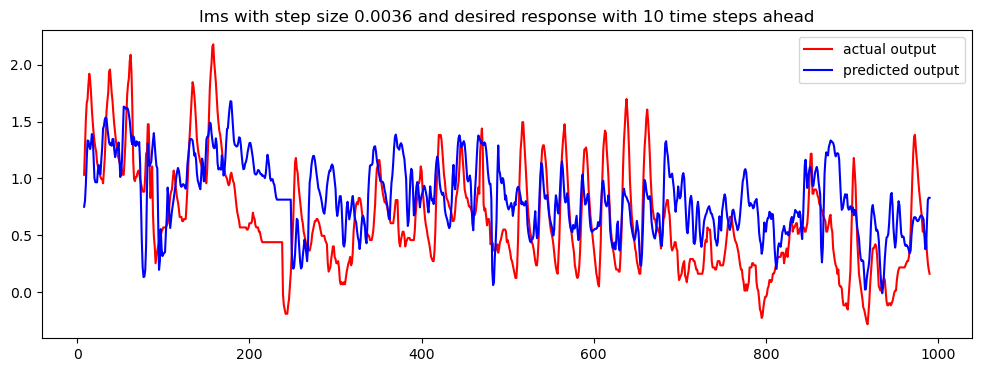

In [36]:
ser = np.arange(fil_order+1,len(ip_val_2)-delay+1)
fig = plt.figure(figsize = (12,4))
plt.plot(ser,op_val_2,'-r',label = 'actual output')
plt.plot(ser,algo_func.klms_pred(ip_val_2,op_val_2,fil_order,e,centers,0.6,0.02),'-b',label = 'predicted output')
plt.title('lms with step size 0.0036 and desired response with 10 time steps ahead')
plt.legend()

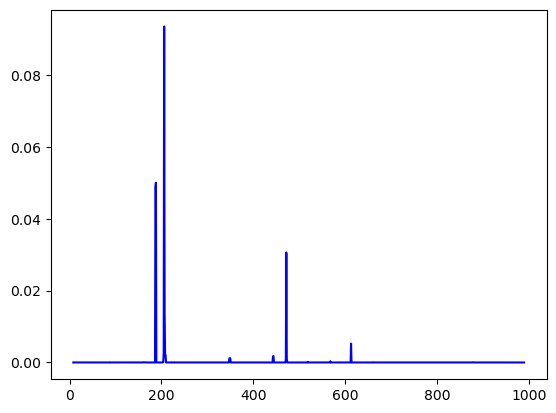

In [28]:
plt.plot(ser,algo_func.klms_pred(ip_val_2,op_val_2,fil_order,e,centers,0.01,1.0),'-b',label = 'predicted output')

<Axes: >

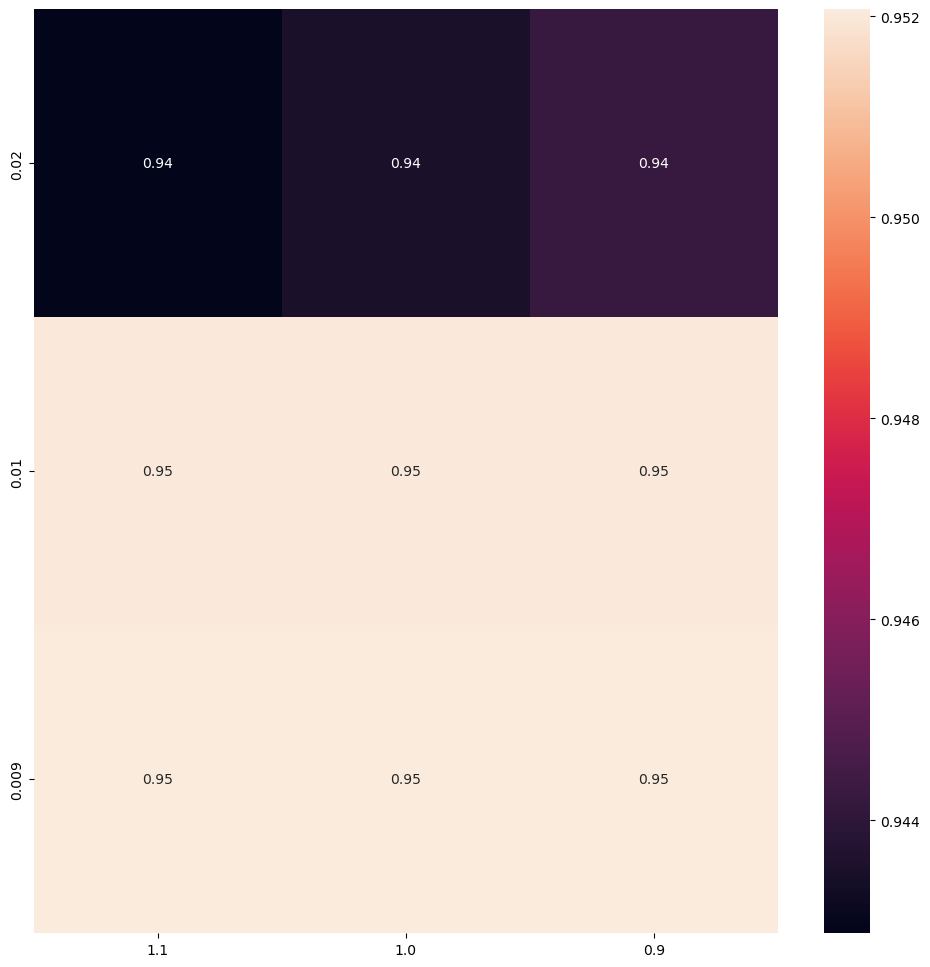

In [22]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(np.round(klms_mse_test,5),xticklabels= np.round(step_size_arr,3),yticklabels=np.round(rk_size_arr,3),robust = True,annot = True)

<Axes: >

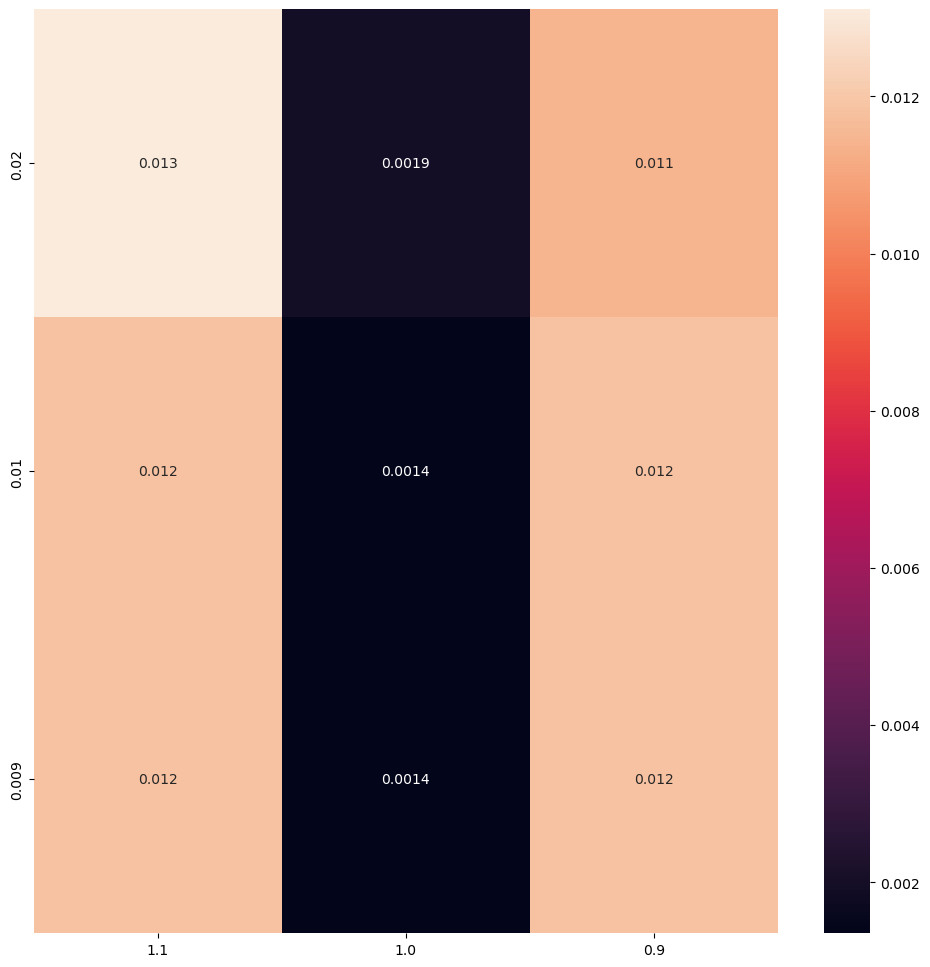

In [23]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(np.round(klms_mse_train,5),xticklabels= np.round(step_size_arr,3),yticklabels=np.round(rk_size_arr,3),robust = True,annot = True)